In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
from matplotlib.patches import Rectangle # for visualizing the robot

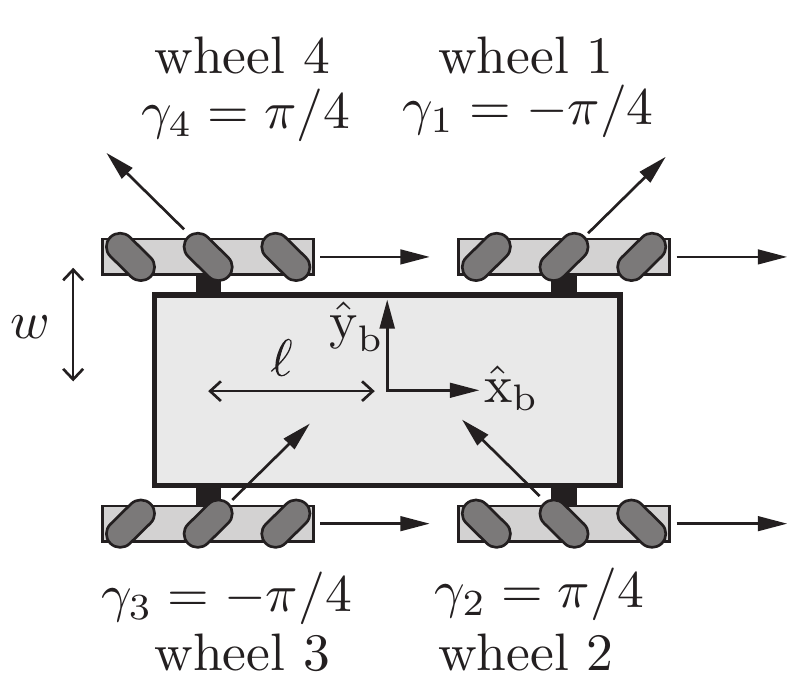

In [7]:
# position of wheels in body frame
w = 0.2
l = 0.5
positions = [(l, w), (l, -w), (-l, -w), (-l, w)]

# angles of "free-sliding"
gammas = [-np.pi/4., np.pi/4., -np.pi/4., np.pi/4.]
# rotation of direction!
betas = [0., 0., 0., 0.]

wheel_radius = 0.1

In [8]:
def compute_H(theta, positions, gammas, betas, wheel_radius):
    m = len(positions) # number of wheels
    h_all = np.zeros((m, 3))
    for i in range(m):
        prefix = 1. / (wheel_radius * np.cos(gammas[i]))
        x_i, y_i = positions[i]
        s1 = np.sin(betas[i] + gammas[i])
        c1 = np.cos(betas[i] + gammas[i])
        s2 = np.sin(betas[i] + gammas[i] + theta)
        c2 = np.cos(betas[i] + gammas[i] + theta)
        h_all[i, :] = prefix * np.array([[x_i * s1 - y_i * c1, c2, s2]])
    return h_all

In [9]:
H = compute_H(0., positions, gammas, betas, wheel_radius)

In [10]:
# Let's first do a "random" simulation
p = np.zeros((3, 1)) # position and theta of the base (θ, x, y)

# timestep
dt = 0.1

all_poses = [p]
for _ in range(1000): # while we haven't reached the target
    u = np.array([[0.5, 0., -0.5, 0.]]).T # wheel commands that do a circle!!
    # Forward simulation using the inverse of H matrix + Euler integration
    H = compute_H(p[0, 0], positions, gammas, betas, wheel_radius) # get current H
    v = np.linalg.pinv(H) @ u
    p = p + v * dt
    # Just for visuals
    all_poses += [p]

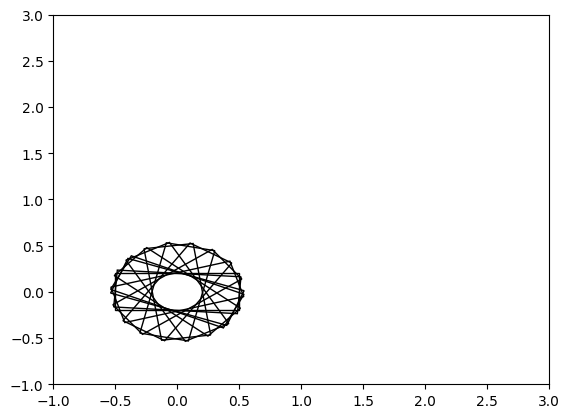

In [11]:
# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111)

def rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

for p in all_poses[::100]:
    # compute positions
    bpb = np.array([[-l, -w]]).T
    bpw = rot(p[0, 0]) @ bpb + p[1:, :]

    rect = Rectangle((bpw[0, 0], bpw[1, 0]), 2*l, 2*w, edgecolor = 'black', fill=False, angle=p[0, 0] * 180. / np.pi)
    # add rectangle to plot
    ax.add_patch(rect)

# Set the limits for the environment
plt.xlim(-1, 3);
plt.ylim(-1, 3);

In [ ]:
# Let's do a small simulation
p = np.zeros((3, 1)) # position and theta of the base (θ, x, y)

# target pose
target_p = np.array([[-np.pi / 2., 1., -2.]]).T

# timestep
dt = 0.1

all_poses = [p]
while np.linalg.norm(target_p - p) > 1e-3: # while we haven't reached the target
    diff = target_p - p # desired velocity (aka reach at the target at one step!)
    H = compute_H(p[0, 0], positions, gammas, betas, wheel_radius) # get current H
    u = H @ diff # transform desired velocity to wheel commands
    max_u = 0.5
    u = np.maximum(-max_u, np.minimum(max_u, u)) # we cannot do arbitrary wheel commands
    # Forward simulation using the inverse of H matrix + Euler integration
    v = np.linalg.pinv(H) @ u
    p = p + v * dt
    # Just for visuals
    all_poses += [p]

In [ ]:
# Plot the trajectory
fig = plt.figure()
ax = fig.add_subplot(111)

def rot(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

for p in all_poses[::40]:
    # compute positions
    bpb = np.array([[-l, -w]]).T
    bpw = rot(p[0, 0]) @ bpb + p[1:, :]

    rect = Rectangle((bpw[0, 0], bpw[1, 0]), 2*l, 2*w, edgecolor = 'black', fill=False, angle=p[0, 0] * 180. / np.pi)
    # add rectangle to plot
    ax.add_patch(rect)

# Set the limits for the environment
plt.xlim(-3, 3);
plt.ylim(-3, 3);